**Modern Portfolio Theory (MPT)**

In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [3]:
tickers_txt = open("TradingView Watchlists/2. Crnt. Portfolio.txt", "r")
tickers = tickers_txt.read().splitlines()
tickers_txt.close()
tickers 

['AMEX:SPY,###SECTION 1,NASDAQ:MSFT,NASDAQ:AAPL,NYSE:LMT,NYSE:XOM,NYSE:JNJ,NYSE:KO,NYSE:MCD,NYSE:MRK,NYSE:PM,NYSE:TSM,###SECTION 2,NASDAQ:TSLA,NYSE:PFE']

In [4]:
list_tickers = re.findall(":[A-Z]{1,5}", str(tickers)) # A ticker has 1-5 capital letters (Max: 5 chars for NYSE, 4 chars for NASDAQ)
list_tickers = [ticker[1:] for ticker in list_tickers] # Remove the colon from the ticker
print(list_tickers)

['SPY', 'MSFT', 'AAPL', 'LMT', 'XOM', 'JNJ', 'KO', 'MCD', 'MRK', 'PM', 'TSM', 'TSLA', 'PFE']


In [5]:
# Disposals: 
list_tickers.remove('TSLA')
list_tickers.remove('PFE')
list_tickers

['SPY', 'MSFT', 'AAPL', 'LMT', 'XOM', 'JNJ', 'KO', 'MCD', 'MRK', 'PM', 'TSM']

In [6]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-09-21'

In [7]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-09-21
End date: 2023-10-21


,Backtest
,
Annual return,10.91%
Cumulative return,24.02%
Annual volatility,14.34 %
Winning day ratio,52.48%
Sharpe ratio,0.79
Calmar ratio,0.83
Information ratio,0.0
Stability,0.78
Max Drawdown,-13.12 %


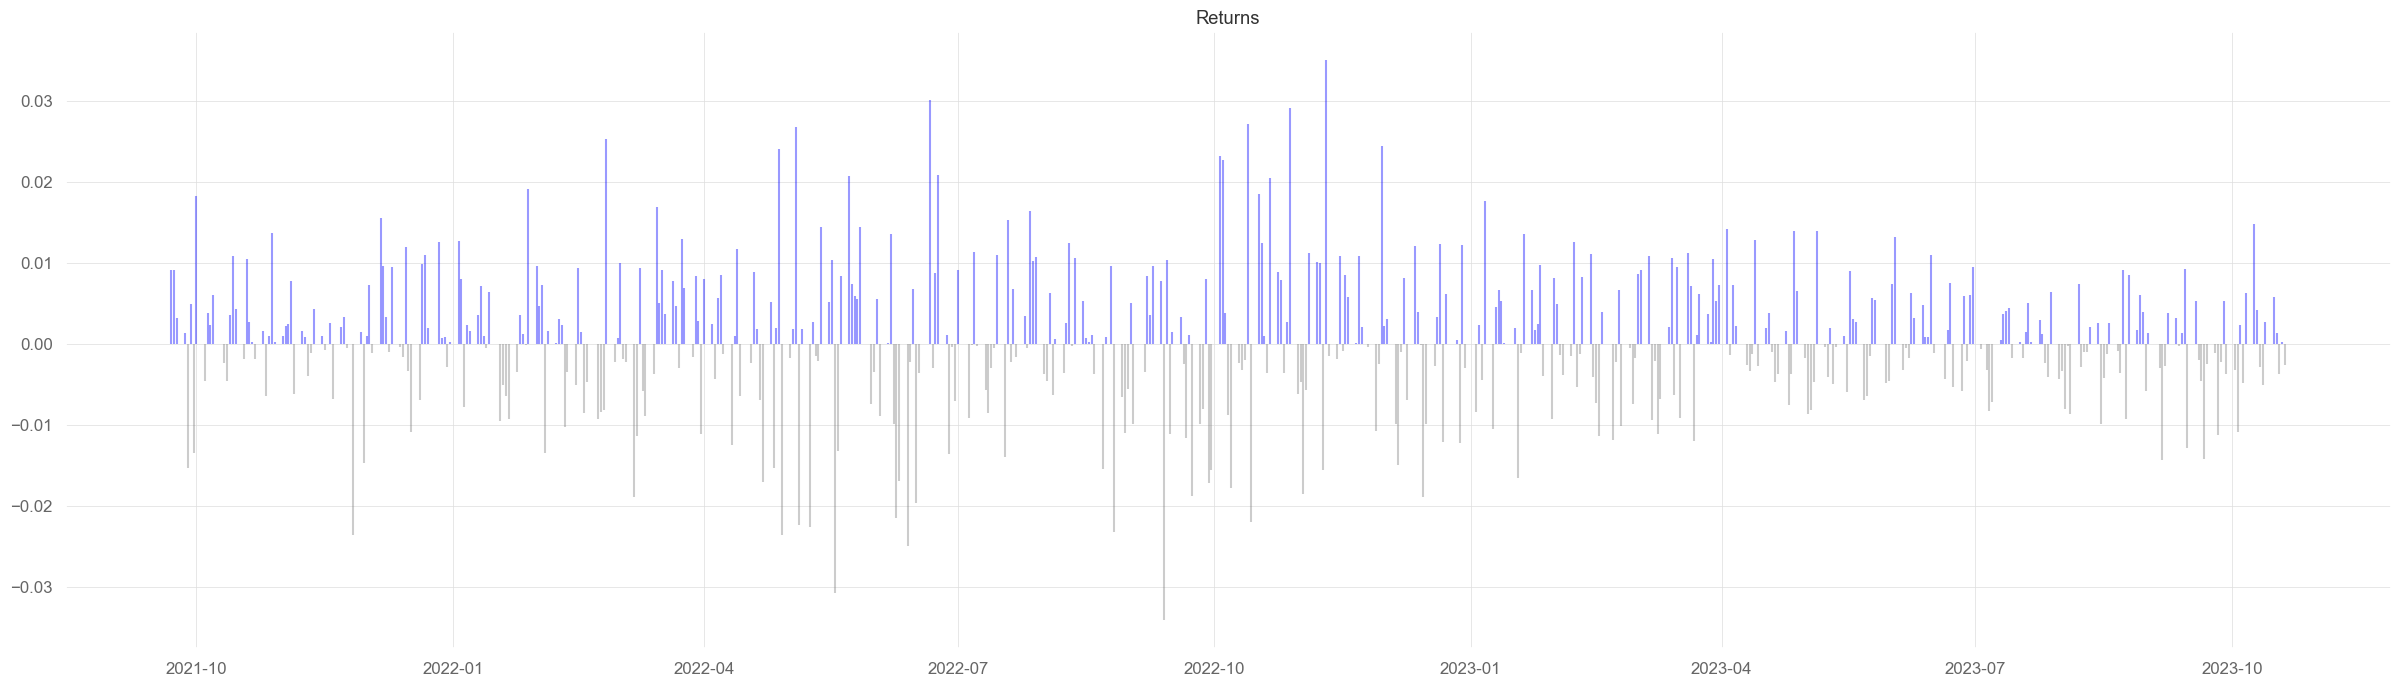

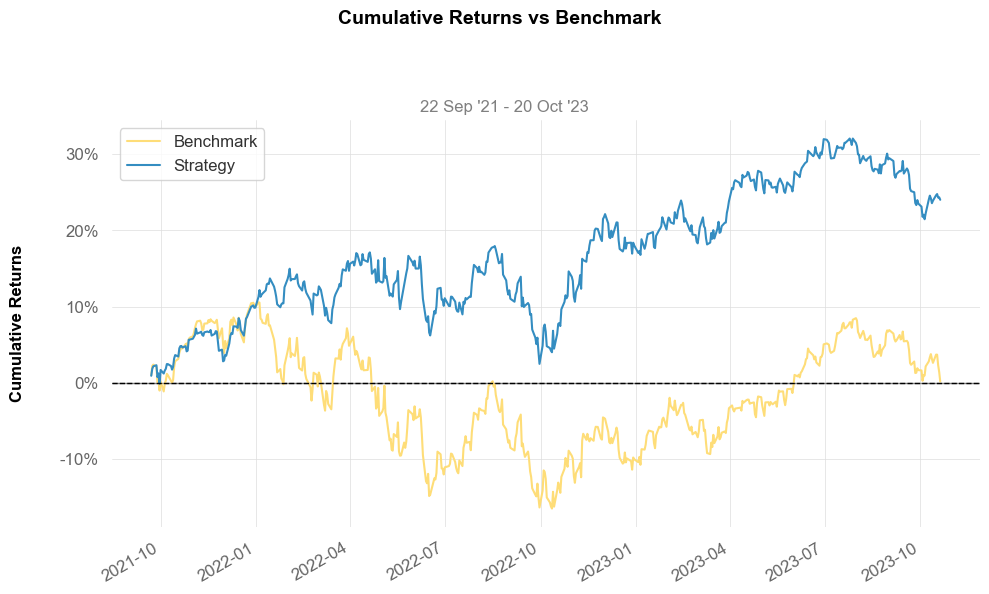

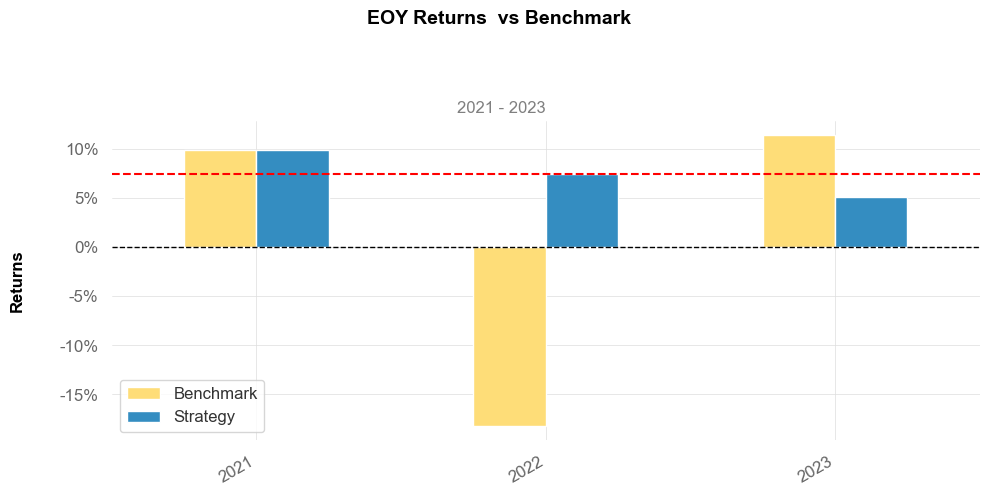

In [8]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [9]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-10-21,2021-11-20,2021-12-21,2022-01-20,2022-02-20,2022-03-22,2022-04-21,2022-05-22,2022-06-21,2022-07-22,...,2023-01-20,2023-02-20,2023-03-22,2023-04-21,2023-05-22,2023-06-21,2023-07-22,2023-08-21,2023-09-21,2023-10-21
SPY,0.09039,0.09113,0.09048,0.09019,0.08893,0.08852,0.08846,0.08678,0.08615,0.08606,...,0.08571,0.08596,0.08597,0.08627,0.08633,0.08650,0.08673,0.08687,0.08706,0.08719
MSFT,0.08795,0.09038,0.08890,0.08824,0.08642,0.08626,0.08573,0.08352,0.08267,0.08261,...,0.07869,0.07865,0.07933,0.07981,0.08037,0.08053,0.08096,0.08119,0.08146,0.08184
AAPL,0.08946,0.09051,0.08953,0.08830,0.08564,0.08482,0.08475,0.08013,0.07822,0.07878,...,0.07556,0.07638,0.07673,0.07722,0.07751,0.07810,0.07862,0.07897,0.07907,0.07967
LMT,0.09374,0.09078,0.09298,0.09368,0.09506,0.09685,0.09693,0.10002,0.09916,0.09914,...,0.09855,0.09843,0.09853,0.09810,0.09773,0.09764,0.09736,0.09717,0.09691,0.09619
XOM,0.09052,0.09103,0.08958,0.08921,0.09034,0.09518,0.09479,0.09320,0.09083,0.09133,...,0.09093,0.09066,0.09035,0.09010,0.08958,0.08976,0.08982,0.08996,0.09016,0.09024
JNJ,0.09371,0.09327,0.09503,0.09644,0.09676,0.09637,0.09604,0.09922,0.10041,0.09996,...,0.10227,0.10172,0.10130,0.10076,0.10070,0.10046,0.09995,0.09961,0.09947,0.09936
KO,0.09351,0.09269,0.09170,0.09286,0.09472,0.09321,0.09385,0.09338,0.09462,0.09471,...,0.09590,0.09592,0.09611,0.09604,0.09614,0.09589,0.09575,0.09563,0.09567,0.09545
MCD,0.09275,0.09189,0.09138,0.09277,0.09293,0.09279,0.09274,0.09269,0.09426,0.09440,...,0.09671,0.09675,0.09662,0.09651,0.09646,0.09613,0.09593,0.09578,0.09568,0.09549
MRK,0.08847,0.08724,0.08868,0.09092,0.09112,0.09191,0.09230,0.09494,0.09612,0.09584,...,0.09941,0.09916,0.09867,0.09831,0.09837,0.09818,0.09775,0.09756,0.09719,0.09720
PM,0.08930,0.09106,0.09279,0.09311,0.09526,0.09199,0.09241,0.09579,0.09680,0.09615,...,0.09585,0.09570,0.09559,0.09530,0.09517,0.09508,0.09508,0.09491,0.09488,0.09467


In [10]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2023-10-21
SPY,0.08719
MSFT,0.08184
AAPL,0.07967
LMT,0.09619
XOM,0.09024
JNJ,0.09936
KO,0.09545
MCD,0.09549
MRK,0.09720
PM,0.09467
